# Reading in a Dataset and Gathering Basic Information
 In this lecture, we will cover how to read in CSV data. CSVs store tabular data organized in rows and columns where, typically, each row is an observation and each column is a variable that you collected data on. The data frames that we've been building from scratch in lectures preceeding this one are in a tabular format.
 
 There are other common types of files:
 - Excel files (which are also tabular data)
 - Shapefiles (for geographic and spatial data)
 - Columnar files (similar to tabular data but more effiecent to store)
 
 These other files that can easily be worked with in R or Python. We will revist these file types later in this course. 
 
 Today, after we read in our CSV, we will gather basic information about the dataset.  We will also discuss basic functions for inspecting dataset properties, dimensions, data types, and summary statistics. Additionally, we will introduce read-write functions, discuss the cost of holding data in RAM, checking resource allocation, and explore lazy load options. Finally, we will touch on the basics of data visualization.
 



In [1]:
# first, some quick housekeeping
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(vroom))
suppressPackageStartupMessages(library(ggplot2))


# install libraries if needed
if (!require(dplyr)) install.packages("dplyr")
if (!require(readr)) install.packages("readr")
if (!require(vroom)) install.packages("vroom")
if (!require(ggplot2)) install.packages("ggplot2")

#load libraries that we will use today
library(dplyr)
library(readr)
library(vroom)
library(ggplot2)


# Reading in CSV Data
There are a million ways to read in CSVs. Let's talk about a few


In [2]:
# -------------------------------------------------------------------------
# Base r
# Pro: no need to load package
# Con: less efficient, slower, and worse at getting variable types right
# Use case: when you have a small and simple data set
# -------------------------------------------------------------------------
df_base <- read.csv("mpg.csv")
head(df_base)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [3]:
# -------------------------------------------------------------------------
# Tidyverse package: readr
# Pro: faster, intuitive at predicting variables types
# Con: Requires a package
# Use case: almost all the time
# let's call this one df because we will work with this object today
# -------------------------------------------------------------------------
library(readr)
df <- read_csv("mpg.csv") # gives a nice message

Rows: 234 Columns: 11
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (6): manufacturer, model, trans, drv, fl, class
dbl (5): displ, year, cyl, cty, hwy

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# -------------------------------------------------------------------------
# Another package: vroom
# Pro: excellent for big data
# Con: a bit clunkier than readr
# Use case: big data
# -------------------------------------------------------------------------
df_vroom <- vroom("mpg.csv") # also gives a nice message

Rows: 234 Columns: 11
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (6): manufacturer, model, trans, drv, fl, class
dbl (5): displ, year, cyl, cty, hwy

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


### In case of emergency 
If you were unable to read in the csv using the methods above, uncomment the following line so that you can continue following along. 

In [5]:
df <- ggplot2::mpg

# A note on big data 
Sometimes, datasets are too large to fit into the working memory of your computer. In such cases, loading the entire dataset at once can be impractical or impossible. This is where load dataset functions come in handy. These functions allow you to read in data in chunks or use lazy loading techniques, which means that data is only read into memory when it is actually needed. This approach helps in managing memory usage efficiently and enables you to work with large datasets without running into memory issues. 

This will be discussed in detail later in the class. But it's worth being aware that your computer has working memory constraints. There are packages out there specifically designed to get around this. For example, the arrow package in R allows you to work with large datasets efficiently by enabling you to `filter()` data and `select()` variables before loading it into memory. This can be particularly useful when working with large datasets that do not fit into memory. You can use the `open_dataset()` function from `arrow` to open a dataset and apply filters before reading it into memory. This function supports various file formats, including CSV, Parquet (columnar), and Feather.

But, for now, just know these constraints and solutions exist!

# Getting basic info about the data frame 

Here are some good ways to get basic information about a dataframe in R:

- `head()`: Displays the first few rows of the dataframe.
- `tail()`: Displays the last few rows of the dataframe.
- `dim()`: Returns the dimensions of the dataframe (number of rows and columns).
- `nrow()`: Returns the number of rows in the dataframe.
- `ncol()`: Returns the number of columns in the dataframe.
- `names()`: Returns the column names of the dataframe.
- `str()`: Displays the structure of the dataframe, including data types and a preview of the data.
- `summary()`: Provides summary statistics for each column in the dataframe.
- `glimpse()`: Similar to `str()`, but provides a more readable output (requires the dplyr package).

Lets run a few of these

In [6]:
# Display the first few rows of the dataframe
head(df)

# Get the dimensions of the dataframe
dim(df)

# Get the column names of the dataframe
names(df)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


[1] 234  11

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

## `glimpse()`

Later on in this course, we will learn how to use Graphical User Interfaces (GUI) to write scripts rather than using Jupyter Notebooks. Examples are R Studio of VSCode. In GUIs when you've got an object like a dataframe loaded you can "investigate it" using the GUI. For now, the `glimpse()` funciton is a really powerful way to get an idea of what your dataframe "looks like". 

In [7]:
glimpse(df)

Rows: 234
Columns: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi", "~
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro", "~
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.~
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, 200~
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, ~
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "auto~
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4", "4~
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, 1~
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, 2~
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p~
$ class        <chr> "compact", "compact", "compact", "compact", "compact", "c~


## `summary()`
The `summary()` function is another powerful way to get a quick statistical summary of the dataset, including measures such as mean, median, minimum, maximum, and quartiles for each numerical column. It is useful for quickly understanding the distribution and central tendency of the data, identifying potential outliers, and gaining insights into the overall structure of the dataset.

In [8]:
summary(df)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

# Basic data visualization 
Another important way to understand your data is to visualize it. Later in this course, we will spend loads of time talking about best practices for data viz. But, we're going to introduce a few core concepts now. 

### Revisiting a data cleaning

Before we make out plots, let's do some data cleaning again. Remember that the variables you do or don't need should be informed by your research question or objective.

In [9]:
# -------------------------------------------------------------------------
# clean data:
# -------------------------------------------------------------------------
# our research Q is:
# - only interested in Ford, dodge and toyota
# - not about the type of fuel "fl"
df_clean <- df %>%
    filter(manufacturer== "ford" | manufacturer== "dodge" | manufacturer== "toyota") %>%
    select(-fl) %>%
    mutate(cyl = as.factor(cyl)) # data manipulation: factor datatypes are discrete categories

glimpse(df_clean)

Rows: 96
Columns: 10
$ manufacturer <chr> "dodge", "dodge", "dodge", "dodge", "dodge", "dodge", "do~
$ model        <chr> "caravan 2wd", "caravan 2wd", "caravan 2wd", "caravan 2wd~
$ displ        <dbl> 2.4, 3.0, 3.3, 3.3, 3.3, 3.3, 3.3, 3.8, 3.8, 3.8, 4.0, 3.~
$ year         <int> 1999, 1999, 1999, 1999, 2008, 2008, 2008, 1999, 1999, 200~
$ cyl          <fct> 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, ~
$ trans        <chr> "auto(l3)", "auto(l4)", "auto(l4)", "auto(l4)", "auto(l4)~
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "f", "f", "f", "f", "4~
$ cty          <int> 18, 17, 16, 16, 17, 17, 11, 15, 15, 16, 16, 15, 14, 13, 1~
$ hwy          <int> 24, 24, 22, 22, 24, 24, 17, 22, 21, 23, 23, 19, 18, 17, 1~
$ class        <chr> "minivan", "minivan", "minivan", "minivan", "minivan", "m~


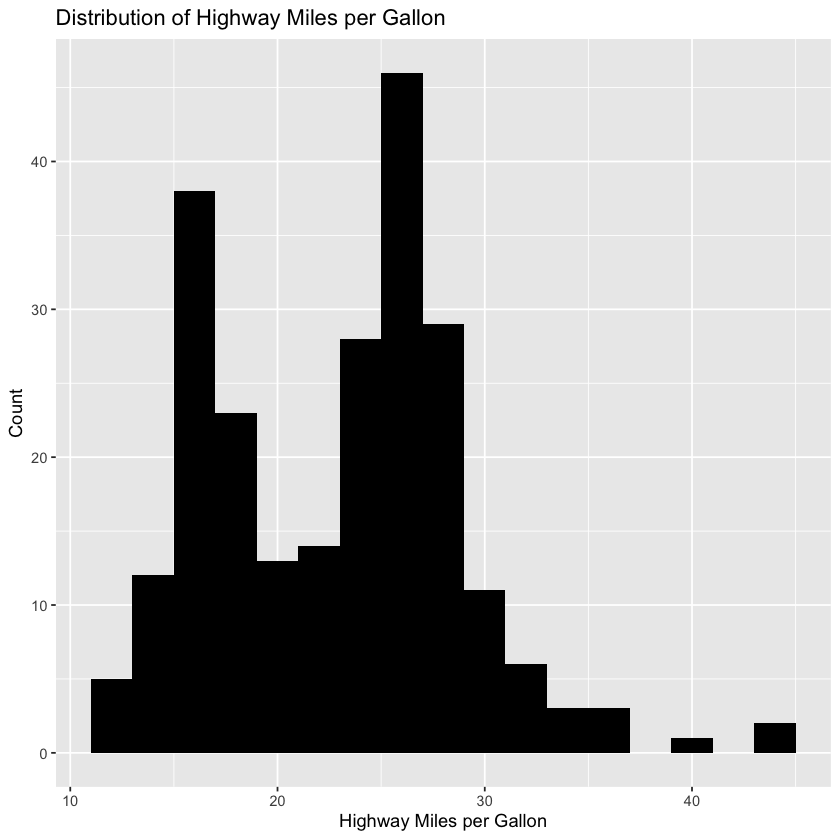

In [10]:
# -------------------------------------------------------------------------
# Histogram -- the distribution of a single numerical variable: geom_histogram()
# -------------------------------------------------------------------------
#AC: run these one line at a time 
#   - aes: aesthetics 
#   - tells you the axis you'll be plotting
#       - x axis: hwy mpg

# dataframe is an input to the plot function
ggplot(df, aes(x = hwy)) +
    # geom_histogram() +
    geom_histogram(binwidth = 2, fill = "black") + # inputs change look
    labs(title = "Distribution of Highway Miles per Gallon",
             x = "Highway Miles per Gallon",
             y = "Count")


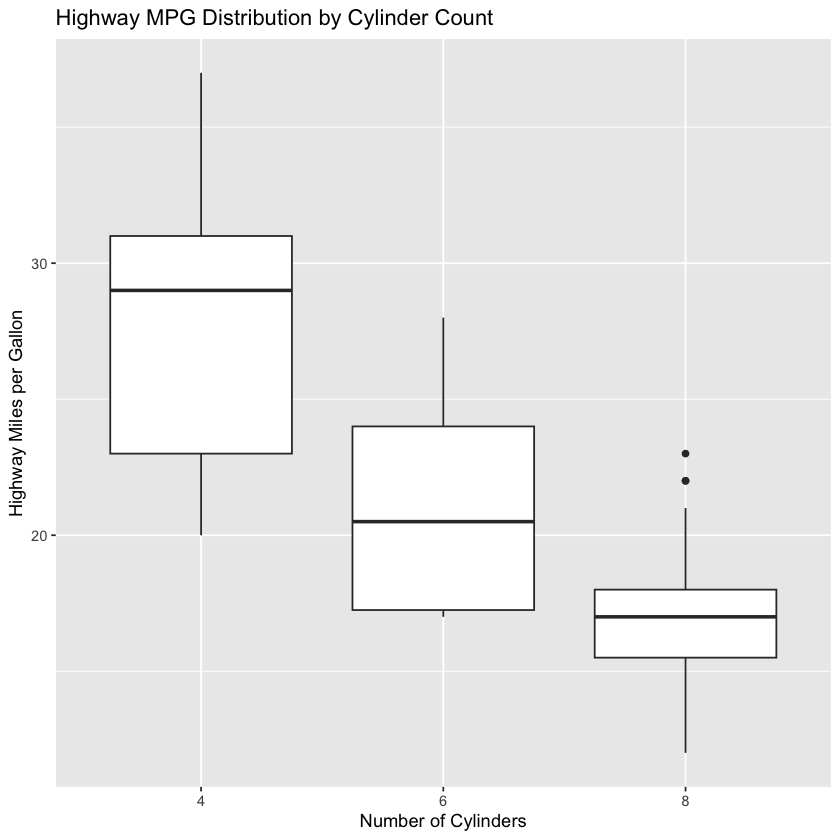

In [11]:
# -------------------------------------------------------------------------
# Box plot -- continuous variable for different categories: geom_boxplot()
# cyl: number of cylinders
# -------------------------------------------------------------------------
df_clean %>% # Pipe data
    ggplot(aes(x = cyl, y = hwy)) + # make the plot
    geom_boxplot() +
    labs(title = "Highway MPG Distribution by Cylinder Count",
         x = "Number of Cylinders",
         y = "Highway Miles per Gallon")

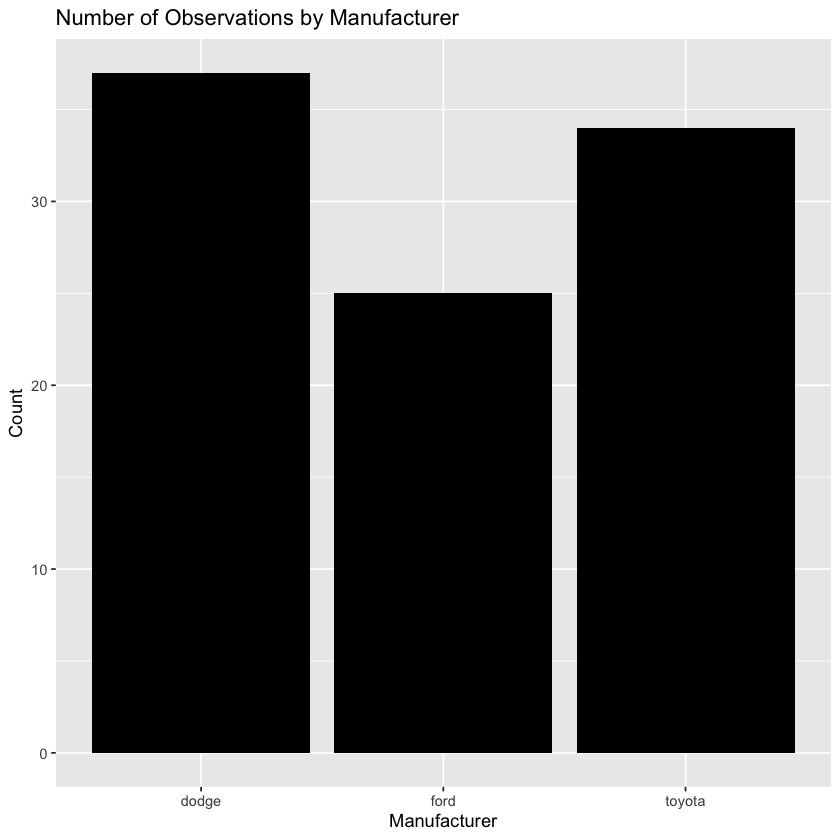

In [12]:
# -------------------------------------------------------------------------
# Bar chart -- count of observations in different categories: geom_bar()
# -------------------------------------------------------------------------
ggplot(df_clean, aes(x = manufacturer)) +
    geom_bar(fill = "black") +
    labs(title = "Number of Observations by Manufacturer",
         x = "Manufacturer",
         y = "Count")

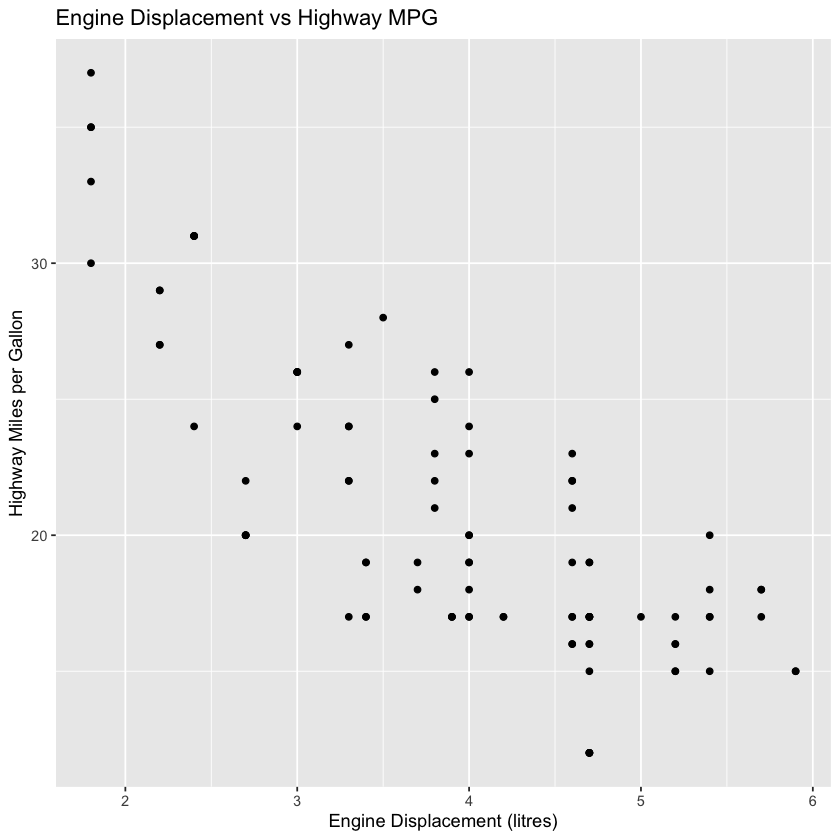

In [13]:
# -------------------------------------------------------------------------
# Scatter plot -- two continuous variables: geom_point()
# hwy: highway miles per gallon
# displ: engine displacement which is approx. engine size
# -------------------------------------------------------------------------
ggplot(df_clean, aes(x = displ, y = hwy)) +
    geom_point() +
    labs(title = "Engine Displacement vs Highway MPG",
         x = "Engine Displacement (litres)",
         y = "Highway Miles per Gallon")

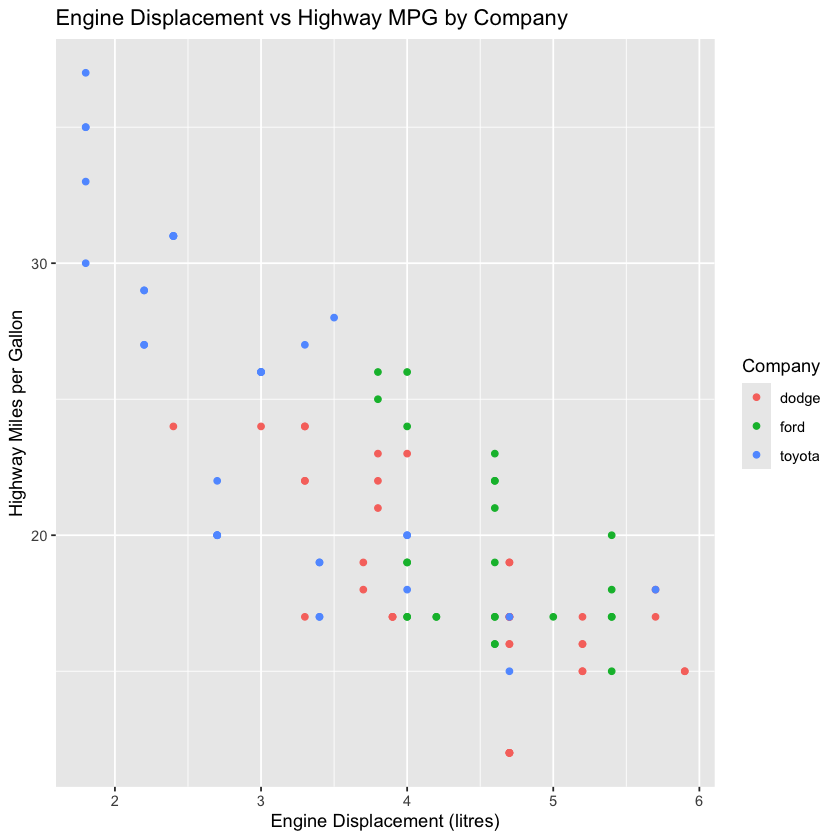

In [14]:
# Third color axis: groups that you want shown in different colors.
ggplot(df_clean, aes(x = displ, y = hwy, color = manufacturer)) +
    geom_point() +
    labs(title = "Engine Displacement vs Highway MPG by Company",
         x = "Engine Displacement (litres)",
         y = "Highway Miles per Gallon",
         color = "Company")

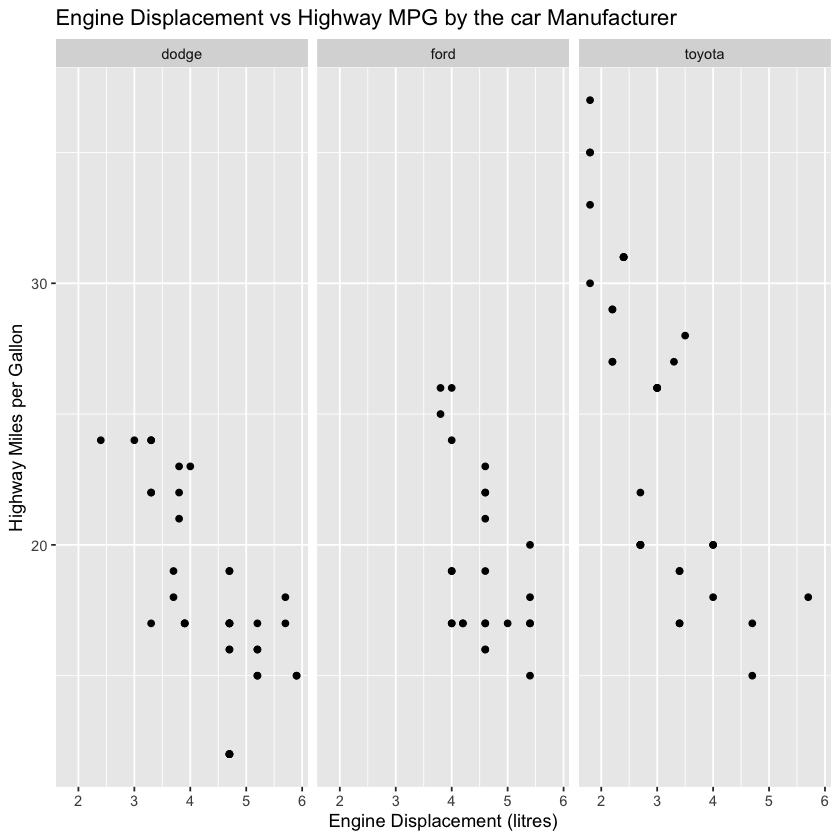

In [15]:
# -------------------------------------------------------------------------
# Multiple plots -- same graph for different categories: facet_wrap()
# - same information as the last chart with the color
# -------------------------------------------------------------------------
# can store a graph as an object
myFacet <- ggplot(df_clean, aes(x = displ, y = hwy)) +
    geom_point() + # type of graph you want to see multiple times
    facet_wrap(~manufacturer) + # separated by what?
    labs(title = "Engine Displacement vs Highway MPG by the car Manufacturer",
         x = "Engine Displacement (litres)",
         y = "Highway Miles per Gallon")
# display the graph
myFacet